In [1]:
# Full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from lib_visualization import *

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)

# Loading train, test, bureau + details, meta data

In [4]:
# load train data
data_path = "home-credit-default-risk/application_train.csv"
pdf_train = pd.read_csv(data_path)

# load test data
data_path = "home-credit-default-risk/application_test.csv"
pdf_test = pd.read_csv(data_path)


In [5]:
# load data
data_path = "home-credit-default-risk/bureau.csv"
pdf_data = pd.read_csv(data_path)
print("Bureau before join: {}".format(pdf_data.shape))
display(pdf_data.head())

# load details info
data_path = "home-credit-default-risk/bureau_balance.csv"
pdf_details = pd.read_csv(data_path)
print("Details: {}".format(pdf_details.shape))
display(pdf_details.head())

Bureau before join: (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Details: (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
# be careful with join how="left/right" which will change SK_ID_BUREAU dtype from int64 to float64
# in this case, we cannot join with bureau_balance (SK_ID_BUREAU)

# join with label
pdf_data_with_label = pdf_data.merge(pdf_train[["SK_ID_CURR", "TARGET"]], on="SK_ID_CURR")
print("After join with train: {} {:.2f}%".format(pdf_data_with_label.shape, pdf_data_with_label.shape[0] * 100.0 / pdf_data.shape[0]))
display(pdf_data_with_label.head())

# join with test
pdf_data_with_test = pdf_data.merge(pdf_test[["SK_ID_CURR"]], on="SK_ID_CURR")
print("After join with test: {} {:.2f} %".format(pdf_data_with_test.shape, pdf_data_with_test.shape[0] * 100.0 / pdf_data.shape[0]))
display(pdf_data_with_test.head())


After join with train: (1465325, 18) 85.37%


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0


After join with test: (251103, 17) 14.63 %


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,261883,5718424,Active,currency 1,-326,0,-142.0,NaN,NaN,0,160047.450,160047.45,NaN,0.0,Consumer credit,-4,NaN
1,261883,5718426,Closed,currency 1,-1039,0,-769.0,-769.0,NaN,0,56515.500,0.00,NaN,0.0,Consumer credit,-761,0.0
2,261883,5718427,Closed,currency 1,-702,0,28.0,-671.0,NaN,0,141840.000,0.00,NaN,0.0,Consumer credit,-659,0.0
3,261883,5718428,Closed,currency 1,-378,0,-144.0,-144.0,0.0,0,0.000,0.00,0.0,0.0,Credit card,-144,NaN
4,261883,5718429,Closed,currency 1,-671,0,-343.0,-343.0,0.0,0,134951.175,0.00,0.0,0.0,Consumer credit,-337,NaN


In [7]:
# load meta data
meta_path = "../02_pandas/reports/report_bureau.csv"
pdf_meta = pd.read_csv(meta_path)

# load meta details
meta_path = "../02_pandas/reports/report_bureau_balance.csv"
pdf_meta_details = pd.read_csv(meta_path)


# Visualize meta-based

Visualize for categorical data...


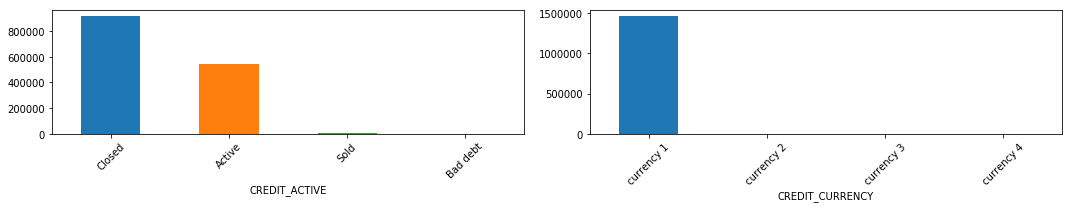

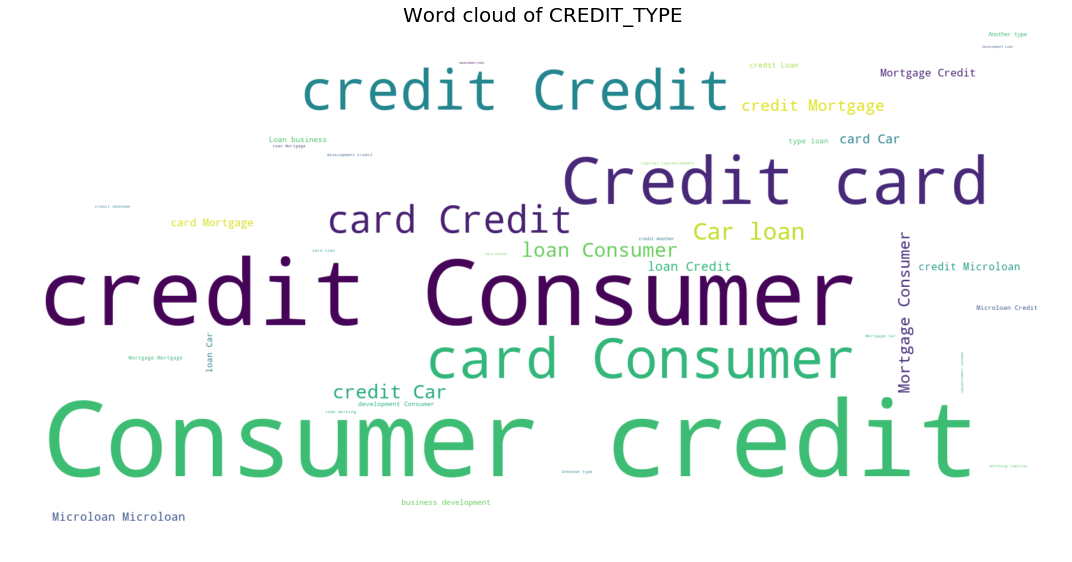

Visualization for numerical data...


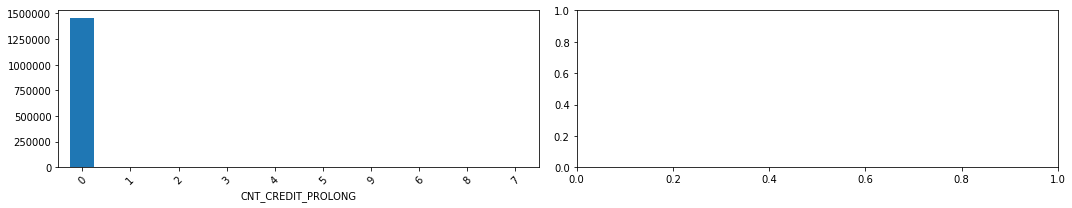

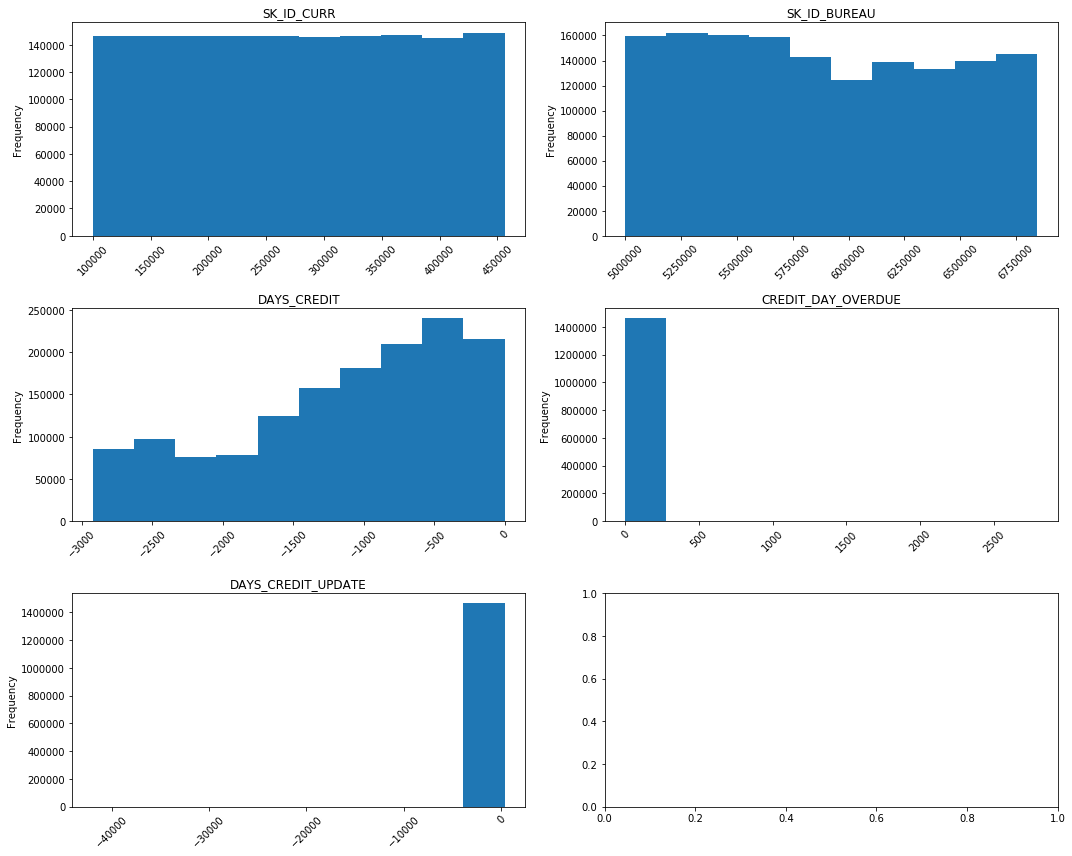

Visualization for continuous data...


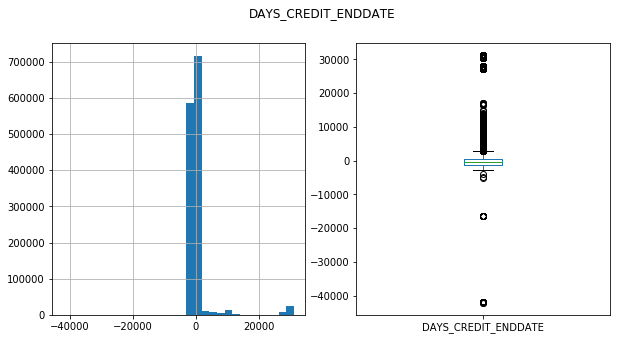

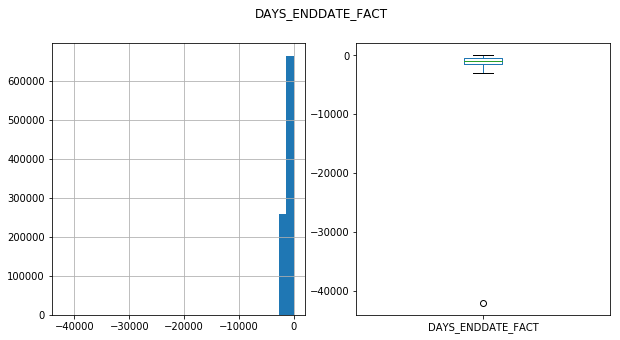

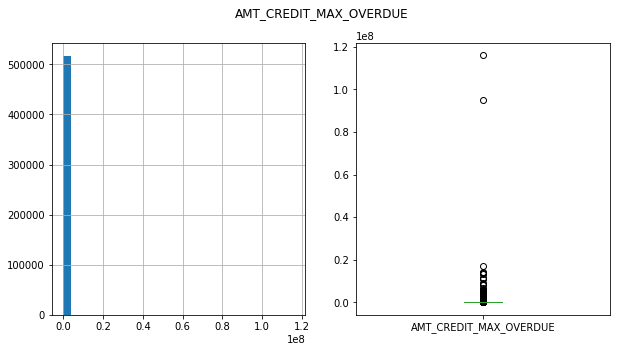

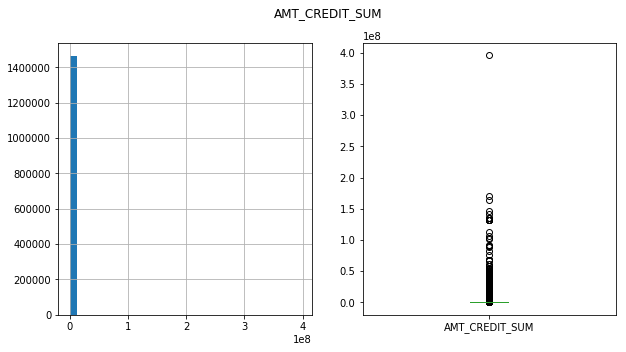

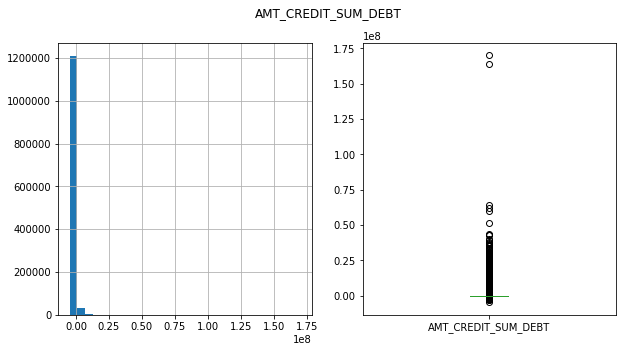

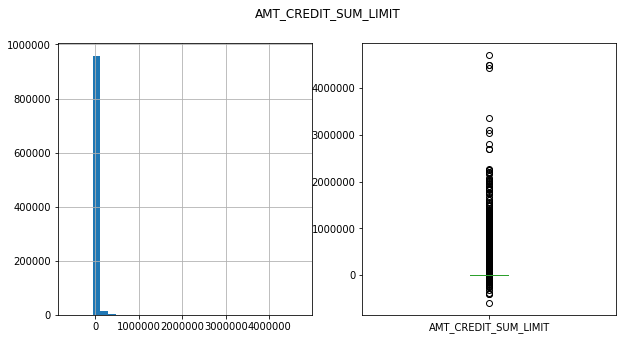

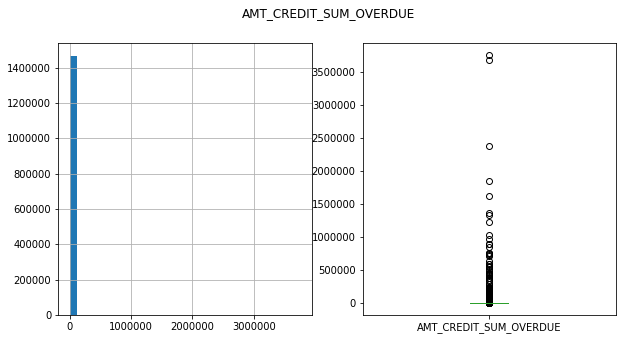

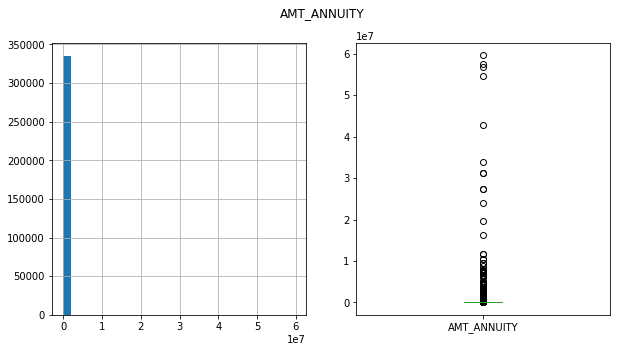

In [8]:
# check train distribution
params = {
    "bar_cate_cols": 2,
    "bar_num_cols": 2,
    "hist_num_cols": 2,
}
visualize_meta_based(pdf_data_with_label, pdf_meta, params)


Visualize for categorical data...


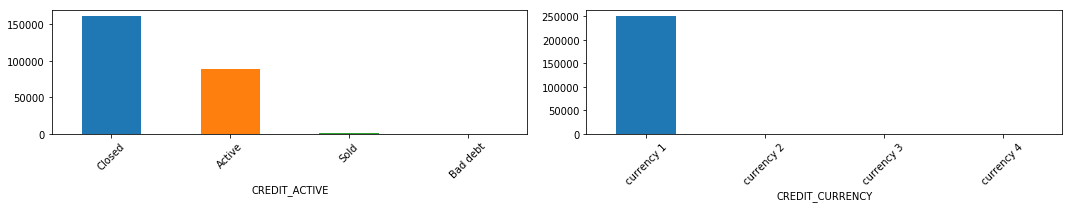

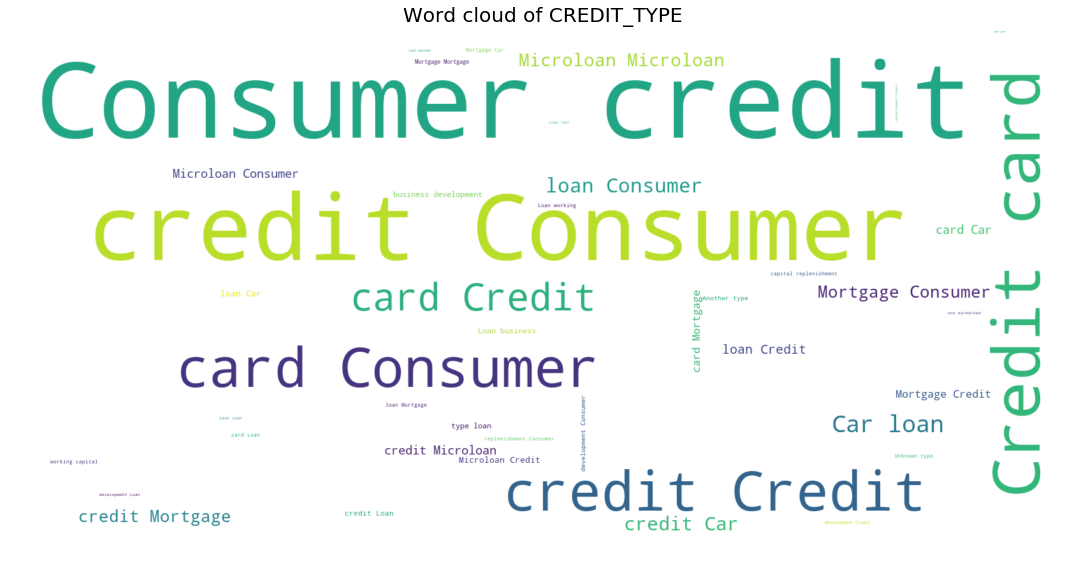

Visualization for numerical data...


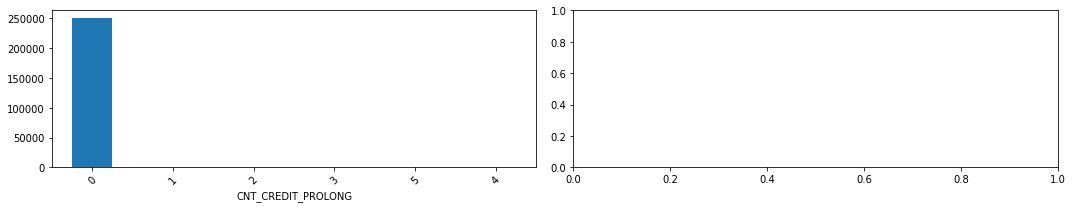

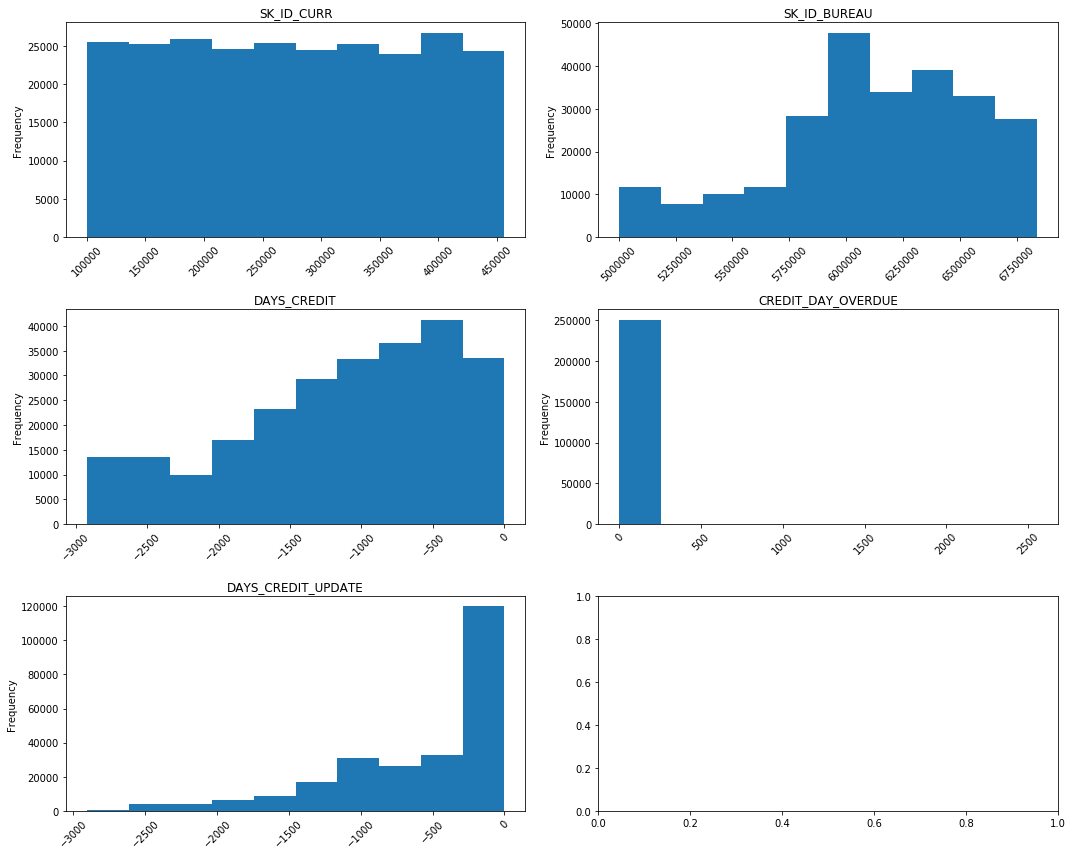

Visualization for continuous data...


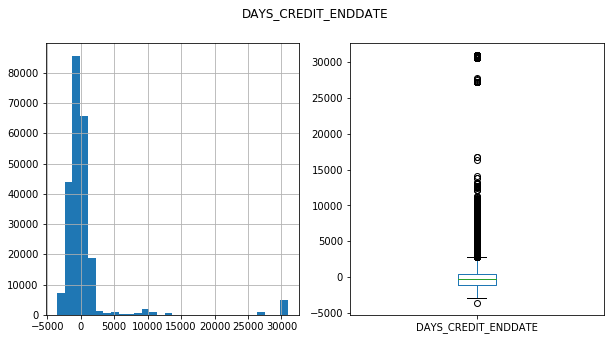

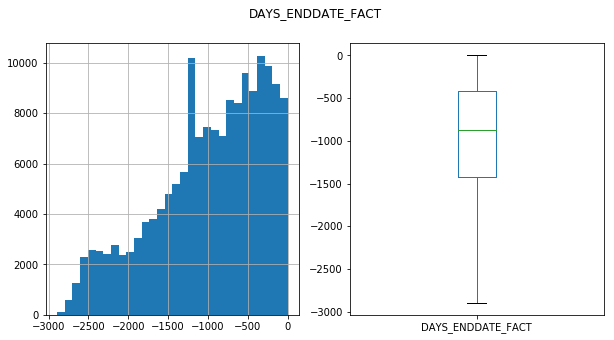

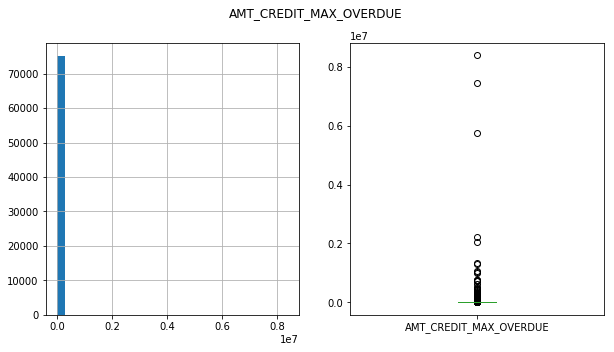

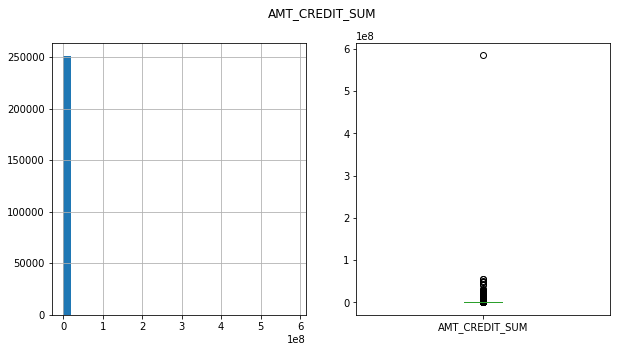

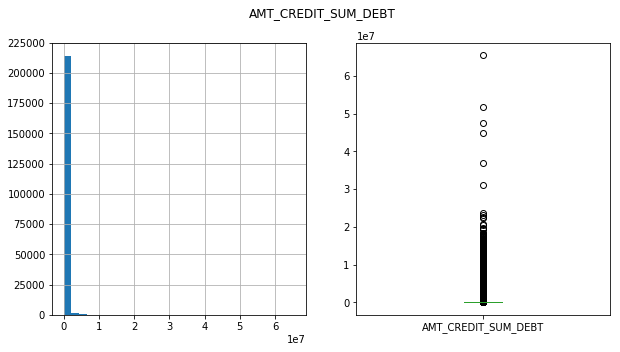

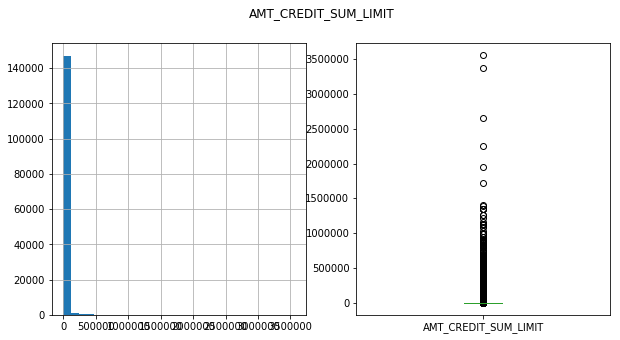

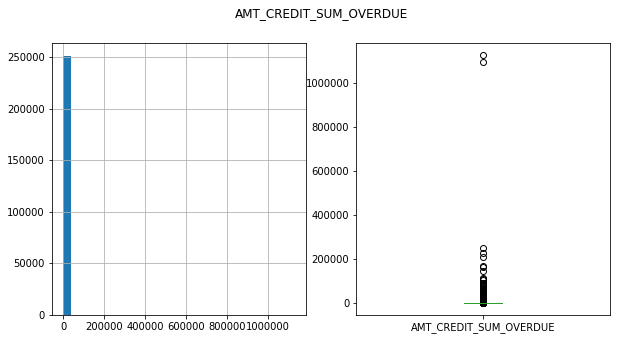

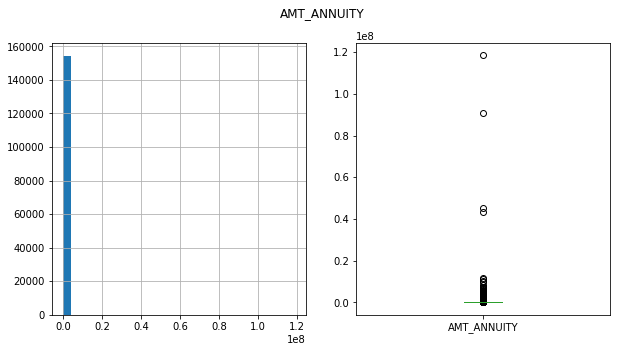

In [9]:
# check test distribution
params = {
    "bar_cate_cols": 2,
    "bar_num_cols": 2,
    "hist_num_cols": 2,
}
visualize_meta_based(pdf_data_with_test, pdf_meta, params)


Visualize for categorical data...


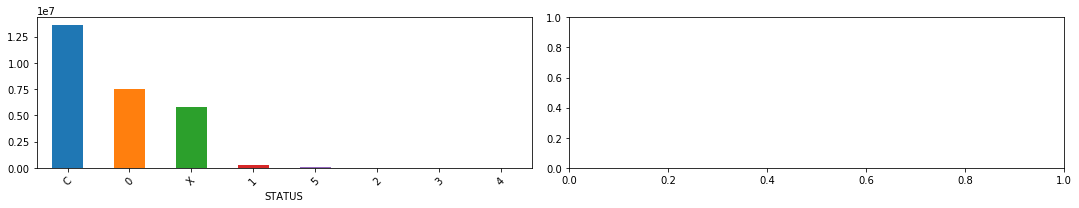

Visualization for numerical data...


<Figure size 1080x0 with 0 Axes>

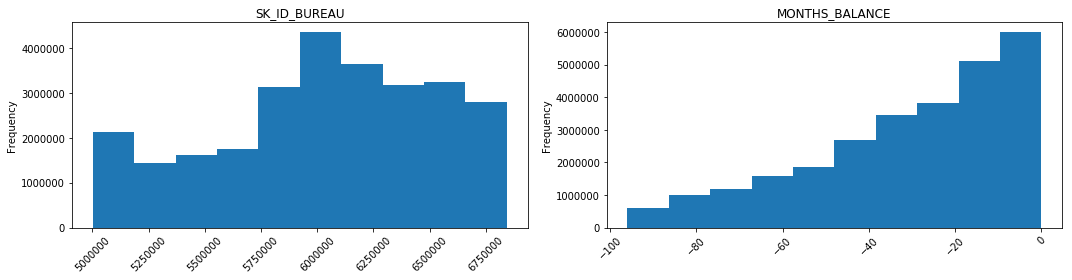

Visualization for continuous data...


In [10]:
# check bureau balance distribution
params = {
    "bar_cate_cols": 2,
    "bar_num_cols": 2,
    "hist_num_cols": 2,
}

visualize_meta_based(pdf_details, pdf_meta_details, params)

# Further analysis

In [11]:
# how many records each users has
pdf_anal01 = pdf_data.groupby("SK_ID_CURR").agg({"SK_ID_BUREAU": "nunique"})
pdf_anal01.describe()

,SK_ID_BUREAU
count,305811.0000
mean,5.6127
std,4.4304
min,1.0000
25%,2.0000
50%,4.0000
75%,8.0000
max,116.0000


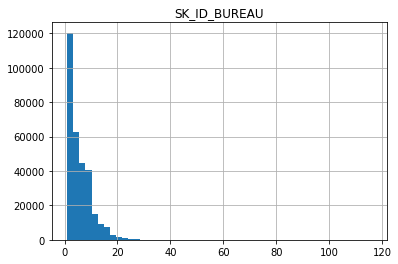

In [12]:
# there's outlier 116 records. Find out who
pdf_anal01.hist(bins=50)
plt.show()

In [13]:
# good signal to detect good user (they have many loan before)
ls_check_user = pdf_anal01.query("SK_ID_BUREAU > 60").index.tolist()
pdf_data_with_label.query("SK_ID_CURR in {}".format(ls_check_user))["TARGET"].value_counts()

0    271
Name: TARGET, dtype: int64

# Check bureau details

**MONTHS_BALANCE**	Month of balance relative to application date (-1 means the freshest balance date). Note: time only relative to the application

**STATUS**	Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )

In [14]:
# NOTE: not every bureau has details
# check good
pdf_data_with_label.query("SK_ID_CURR == 215354").merge(pdf_details, on="SK_ID_BUREAU")

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET,MONTHS_BALANCE,STATUS


In [15]:
# check bad
pdf_data_with_label.query("SK_ID_CURR == 338464").merge(pdf_details, on="SK_ID_BUREAU")

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET,MONTHS_BALANCE,STATUS


In [16]:
# merge bureau with balance (details)
pdf_bureau_details = pdf_data_with_label.merge(pdf_details, on="SK_ID_BUREAU")
pdf_bureau_details.shape

(14701612, 20)

In [17]:
# sampling n sample by target and columns
def sample_data_lookup(pdf_input, ls_cols, n_samples):
    res_out = []
    for i in range(2):
        dict_tmp = {}
        ls_ids = pdf_input.query("TARGET == {}".format(i))["SK_ID_CURR"].unique()[:n_samples]
        dict_tmp["ids"] = ls_ids
        dict_tmp["pdf"] = pdf_input.query("SK_ID_CURR in {}".format(tuple(ls_ids)))[ls_cols]
        res_out.append(dict_tmp)
    
    return res_out

In [18]:
res_out = sample_data_lookup(pdf_bureau_details, ["SK_ID_BUREAU", "MONTHS_BALANCE", "STATUS"], 1)

In [19]:
# try on bureau has details
# check good
print(res_out[0]["pdf"].shape)
res_out[0]["pdf"].head()

(398, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [20]:
res_out[0]["pdf"]["STATUS"].value_counts()

X    157
C    133
0    108
Name: STATUS, dtype: int64

In [21]:
res_out[0]["pdf"]["MONTHS_BALANCE"].nunique()

87

In [22]:
# check bad
print(res_out[1]["pdf"].shape)
res_out[1]["pdf"].head()

(147, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
424,5715470,0,C
425,5715470,-1,C
426,5715470,-2,C
427,5715470,-3,C
428,5715470,-4,C


In [23]:
# bad user has 1,2 DPD
res_out[1]["pdf"]["STATUS"].value_counts()

C    101
0    29 
X    11 
1    4  
2    2  
Name: STATUS, dtype: int64

In [24]:
res_out[1]["pdf"]["MONTHS_BALANCE"].nunique()

82

In [25]:
# Note for details
# Each BUREAU you have number of transaction and count number of BUREAU status over transactions
# MONTHS_BALANCE equals number of transaction, and tracked continuously
res_out[1]["pdf"].query("SK_ID_BUREAU == 5715470")

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
424,5715470,0,C
425,5715470,-1,C
426,5715470,-2,C
427,5715470,-3,C
428,5715470,-4,C
429,5715470,-5,C
430,5715470,-6,C
431,5715470,-7,C
432,5715470,-8,C
433,5715470,-9,C


## check CREDIT_ACTIVE

Status of the Credit Bureau (CB) reported credits

In [26]:
# Closed > Active > Sold > Bad debt (in volumn)
# FE: used as binary, frequency
pdf_data_with_label.groupby(["CREDIT_ACTIVE", "TARGET"]).size()

CREDIT_ACTIVE  TARGET
Active         0         491583
               1         50336 
Bad debt       0         16    
               1         4     
Closed         0         854124
               1         63609 
Sold           0         5082  
               1         571   
dtype: int64

In [27]:
ls_credit_active = ["Closed", "Active", "Sold", "Bad debt"]
for item in ls_credit_active:
    print("\n{}".format(item))
    describe_summary = (pdf_data_with_label.query("CREDIT_ACTIVE == '{}'".format(item))
                        .groupby("SK_ID_CURR").size().describe())
    
    print(describe_summary)


Closed
count    230165.0000
mean     3.9873     
std      3.3287     
min      1.0000     
25%      2.0000     
50%      3.0000     
75%      5.0000     
max      108.0000   
dtype: float64

Active
count    217150.0000
mean     2.4956     
std      1.6683     
min      1.0000     
25%      1.0000     
50%      2.0000     
75%      3.0000     
max      32.0000    
dtype: float64

Sold
count    5226.0000
mean     1.0817   
std      0.3332   
min      1.0000   
25%      1.0000   
50%      1.0000   
75%      1.0000   
max      9.0000   
dtype: float64

Bad debt
count    20.0
mean     1.0 
std      0.0 
min      1.0 
25%      1.0 
50%      1.0 
75%      1.0 
max      1.0 
dtype: float64


## check currency

Recoded currency of the Credit Bureau credit

In [28]:
# FE: convert to one-hot, frequency
pdf_data_with_label["CREDIT_CURRENCY"].value_counts()

currency 1    1464094
currency 2    1072   
currency 3    150    
currency 4    9      
Name: CREDIT_CURRENCY, dtype: int64

In [29]:
# mostly, they use 1-3 currency
pdf_data_with_label.groupby("SK_ID_CURR").agg({"CREDIT_CURRENCY": "nunique"})["CREDIT_CURRENCY"].value_counts()

1    262557
2    912   
3    22    
Name: CREDIT_CURRENCY, dtype: int64

In [30]:
pdf_data_with_label.query("CREDIT_CURRENCY == 'currency 3'")["TARGET"].value_counts()

0    133
1    17 
Name: TARGET, dtype: int64

## check CNT_CREDIT_PROLONG

How many times was the Credit Bureau credit prolonged

In [31]:
# FE: statistics for this column
pdf_data_with_label.groupby(["CNT_CREDIT_PROLONG", "TARGET"]).size()

CNT_CREDIT_PROLONG  TARGET
0                   0         1342755
                    1         113750 
1                   0         6707   
                    1         656    
2                   0         1084   
                    1         105    
3                   0         182    
                    1         7      
4                   0         51     
                    1         2      
5                   0         20     
6                   0         2      
7                   0         1      
8                   0         1      
9                   0         2      
dtype: int64

## DAYS_CREDIT

**DAYS_CREDIT**:	How many days before current application did client apply for Credit Bureau credit

**CREDIT_DAY_OVERDUE**:	Number of days past due on CB credit at the time of application for related loan in our sample

**DAYS_CREDIT_UPDATE**:	How many days before loan application did last information about the Credit Bureau credit

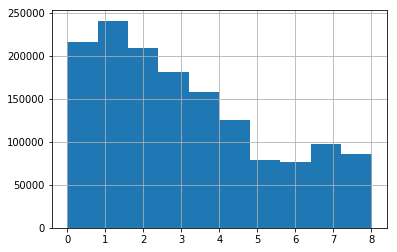

In [32]:
# FE: convert to years and calculate statistics
(pdf_data_with_label["DAYS_CREDIT"] / -365).hist()
plt.show()

In [33]:
# check CREDIT_DAY_OVERDUE
# too many zeros
(pdf_data_with_label["CREDIT_DAY_OVERDUE"] == 0).mean()

0.9974708682374217

In [34]:
(pdf_data_with_label["CREDIT_DAY_OVERDUE"] > 40).mean()

0.0011758483612850392

In [35]:
pdf_data_with_label.query("CREDIT_DAY_OVERDUE > 40")["TARGET"].value_counts()

0    1461
1    262 
Name: TARGET, dtype: int64

In [36]:
(pdf_data_with_label["CREDIT_DAY_OVERDUE"] / 365).astype(np.int64).value_counts()

0    1464534
1    176    
2    128    
4    124    
6    107    
3    93     
5    91     
7    72     
Name: CREDIT_DAY_OVERDUE, dtype: int64

In [37]:
# check DAYS_CREDIT_UPDATE
# some outliers
pdf_check = pdf_data_with_label[["SK_ID_CURR", "DAYS_CREDIT_UPDATE", "TARGET"]].copy()
pdf_check["YEARS_CREDIT_UPDATE"] = (pdf_check["DAYS_CREDIT_UPDATE"] / -365).astype(np.int64)
pdf_check["YEARS_CREDIT_UPDATE"].value_counts()

 0      705121
 1      269061
 2      218605
 3      97332 
 4      64762 
 6      49091 
 5      48476 
 7      12781 
 114    95    
-1      1     
Name: YEARS_CREDIT_UPDATE, dtype: int64

In [38]:
pdf_check.query("YEARS_CREDIT_UPDATE == 114")["TARGET"].value_counts()

0    82
1    13
Name: TARGET, dtype: int64

## Others

**DAYS_CREDIT_ENDDATE**: Remaining duration of CB credit (in days) at the time of application in Home Credit

**DAYS_ENDDATE_FACT**:	Days since CB credit ended at the time of application in Home Credit (only for closed credit)

**AMT_CREDIT_MAX_OVERDUE**:	Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
	
**AMT_CREDIT_SUM**:	Current credit amount for the Credit Bureau credit

**AMT_CREDIT_SUM_DEBT**:	Current debt on Credit Bureau credit

**AMT_CREDIT_SUM_LIMIT**:	Current credit limit of credit card reported in Credit Bureau

**AMT_CREDIT_SUM_OVERDUE**	Current amount overdue on Credit Bureau credit

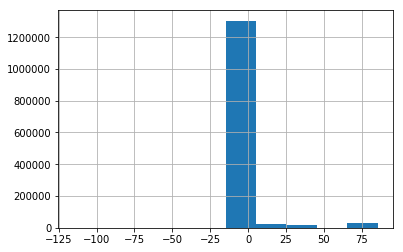

In [39]:
(pdf_data_with_label["DAYS_CREDIT_ENDDATE"] / 365).hist()
plt.show()

In [40]:
# why still have minus records?
(pdf_data_with_label["DAYS_CREDIT_ENDDATE"] / 365).describe()

count    1.3762e+06
mean     1.3510e+00
std      1.3602e+01
min     -1.1523e+02
25%     -3.1342e+00
50%     -9.1507e-01
75%      1.2959e+00
max      8.5477e+01
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [41]:
# some outliers
pdf_tmp = (pdf_data_with_label["DAYS_ENDDATE_FACT"] / -365)
(pdf_tmp[~pdf_tmp.isna()]).astype(np.int64).value_counts()

pdf_check = pdf_data_with_label[["SK_ID_CURR", "DAYS_ENDDATE_FACT", "TARGET"]].copy()
pdf_check = pdf_check[~pdf_check["DAYS_ENDDATE_FACT"].isna()]
pdf_check["YEARS_ENDDATE_FACT"] = (pdf_check["DAYS_ENDDATE_FACT"] / -365).astype(np.int64)
pdf_check["YEARS_ENDDATE_FACT"].value_counts()

0      196994
1      184303
2      177452
3      119848
4      83428 
5      69789 
6      69512 
7      19323 
8      2     
115    1     
Name: YEARS_ENDDATE_FACT, dtype: int64

In [42]:
# good sign here
pdf_check.query("YEARS_ENDDATE_FACT > 7")["TARGET"].value_counts()

0    3
Name: TARGET, dtype: int64

In [43]:
pdf_check.query("YEARS_ENDDATE_FACT > 6")["TARGET"].value_counts()

0    18279
1    1047 
Name: TARGET, dtype: int64